In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

#Correlaciones
# ------------------------------------------------------------------------------
from itertools import combinations

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, chi2_contingency, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("data/rrhh_elbueno.csv", index_col=0)
df.shape

(311, 29)

In [4]:
df.head()

,employee_name,empid,genderid,empstatusid,department,salary,termd,position,state,zip,date_of_birth,maritaldesc,citizendesc,hispaniclatino,racedesc,dateofhire,dateoftermination,termreason,employmentstatus,managername,managerid,recruitmentsource,performancescore,engagementsurvey,empsatisfaction,specialprojectscount,lastperformancereview_date,dayslatelast30,absences
0,"Adinolfi, Wilson K",10026,Masculine,1,Production,62506.0,No,Production Technician I,MA,1960,1983-07-10,Single,US Citizen,No,White,2011-07-05,NaN,Terminated,Active,Michael Albert,22.0,LinkedIn,Exceeds,4.60,Very Satisfied,0,2019-01-17,0,1
1,Unknown,10084,Masculine,5,IT/IS,104437.0,Yes,Sr. DBA,MA,2148,1975-05-05,Married,US Citizen,No,White,1900-01-01,2016-06-16,N/A-StillEmployed,Voluntarily Terminated,Simon Roup,4.0,Indeed,Fully Meets,4.96,Neutral,6,1900-01-01,999,17
2,"Akinkuolie, Sarah",10196,Femenine,5,Production,64955.0,Yes,Production Technician II,MA,1810,1988-09-19,Married,US Citizen,No,Unknown,1900-01-01,2012-09-24,hours,Voluntarily Terminated,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,Neutral,0,2012-05-15,999,3
3,"Alagbe,Trina",10088,Femenine,1,Production,64991.0,No,Production Technician I,MA,1886,1988-09-27,Married,US Citizen,No,Unknown,2008-01-07,NaN,Terminated,Active,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,Very Satisfied,0,2019-01-03,999,15
4,"Anderson, Carol",10069,Femenine,5,Production,50825.0,Yes,Production Technician I,MA,2169,1989-09-08,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Webster Butler,39.0,Google Search,Fully Meets,5.00,Satisfied,0,2016-02-01,0,2


In [5]:
p_value = shapiro(df['salary']).pvalue

alpha = 0.05
if p_value > alpha:
    print("Los datos se ajustan a una distribución normal (p-value =", p_value, ")")
else:
    print("Los datos no se ajustan a una distribución normal (p-value =", p_value, ")")

Los datos no se ajustan a una distribución normal (p-value = 1.1153312275049991e-23 )


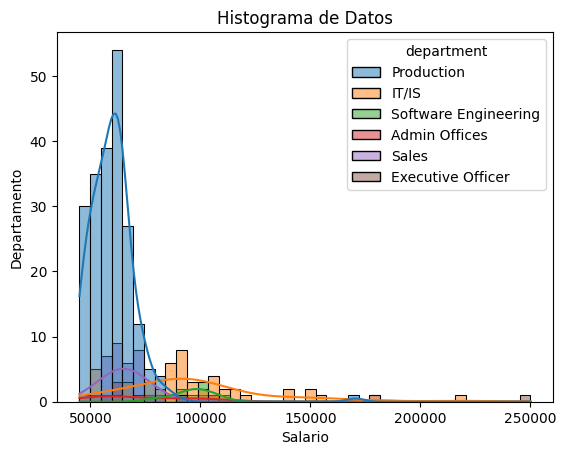

In [6]:
# Crear un histograma para visualizar la distribución
sns.histplot(x='salary', 
         hue='department',
         data=df,
         kde = True)
         
# ponemos título a la gráfica
plt.title('Histograma de Datos')

# cambiamos el nombre del eje x
plt.xlabel('Salario')

# cambiamos el nombre del eje y
plt.ylabel('Departamento');

In [7]:
#Vamos a ver relaciones entre las colunnas numéricas:
# definimos la lista los nombres de las variables numéricas 
numericas = df.select_dtypes(include = np.number).columns
numericas

Index(['empid', 'empstatusid', 'salary', 'zip', 'managerid',
       'engagementsurvey', 'specialprojectscount', 'dayslatelast30',
       'absences'],
      dtype='object')

In [8]:
numericas = ['salary', 'engagementsurvey', 'specialprojectscount', 'dayslatelast30', 'absences']

# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(numericas, 2))
# Hemos creado una lista de tuplas con los resultados

In [9]:
# creamos una función para identificar si las relaciones entre las variables son lienales o no
def identificar_linealidad (dataframe, lista_combinacion_columnas):
    """
    Identifica si las relaciones entre pares de variables en un DataFrame son lineales o no.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        El DataFrame que contiene las variables a analizar.

    lista_combinacion_columnas : list of tuples
        Una lista de tuplas donde cada tupla contiene dos nombres de columnas del DataFrame que se desea analizar.

    Returns:
    --------
    relaciones_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que tienen una relación lineal.

    relaciones_no_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que no tienen una relación lineal.

    """
    relaciones_lineales = []
    relaciones_no_lineales = []

    for tupla in lista_combinacion_columnas: 
        # Realizar la prueba de normalidad
        _, p_value1 = kstest(dataframe[tupla[0]], "norm")
        _, p_value2 = kstest(dataframe[tupla[1]], "norm")

        if p_value1 > 0.05 and p_value2 > 0.05:
            relaciones_lineales.append(tupla)
        else:
            relaciones_no_lineales.append(tupla)

    return relaciones_lineales, relaciones_no_lineales

# llamamos a la funcion
lineal, no_lineal = identificar_linealidad(df, combinaciones)

print(f"Las variables a las que tengamos que aplicar la correlacion de pearson son: {lineal}")
print(f"Las variables a las que tengamos que aplicar la correlacion de spearman son: {no_lineal}")

Las variables a las que tengamos que aplicar la correlacion de pearson son: []
Las variables a las que tengamos que aplicar la correlacion de spearman son: [('salary', 'engagementsurvey'), ('salary', 'specialprojectscount'), ('salary', 'dayslatelast30'), ('salary', 'absences'), ('engagementsurvey', 'specialprojectscount'), ('engagementsurvey', 'dayslatelast30'), ('engagementsurvey', 'absences'), ('specialprojectscount', 'dayslatelast30'), ('specialprojectscount', 'absences'), ('dayslatelast30', 'absences')]


In [10]:
# como todas las parejas de variables tienen relaciones no lineales, aplicaremos la correlación de Spearman a todo el DataFrame
df_correlaciones = df.corr(numeric_only = True, method = "spearman")
df_correlaciones

,empid,empstatusid,salary,zip,managerid,engagementsurvey,specialprojectscount,dayslatelast30,absences
empid,1.000000,0.070279,-0.090664,0.000972,0.098095,-0.575832,-0.021315,0.183307,-0.022735
empstatusid,0.070279,1.000000,-0.104373,-0.029460,0.140178,0.011427,-0.023491,-0.082260,0.084085
salary,-0.090664,-0.104373,1.000000,0.013084,-0.455582,0.031117,0.371031,0.035618,0.079194
zip,0.000972,-0.029460,0.013084,1.000000,0.120785,0.026454,-0.003064,0.055081,-0.005466
managerid,0.098095,0.140178,-0.455582,0.120785,1.000000,-0.019715,-0.406351,0.011339,0.091051
engagementsurvey,-0.575832,0.011427,0.031117,0.026454,-0.019715,1.000000,-0.005884,-0.161057,-0.006484
specialprojectscount,-0.021315,-0.023491,0.371031,-0.003064,-0.406351,-0.005884,1.000000,-0.023866,0.006738
dayslatelast30,0.183307,-0.082260,0.035618,0.055081,0.011339,-0.161057,-0.023866,1.000000,-0.028439
absences,-0.022735,0.084085,0.079194,-0.005466,0.091051,-0.006484,0.006738,-0.028439,1.000000


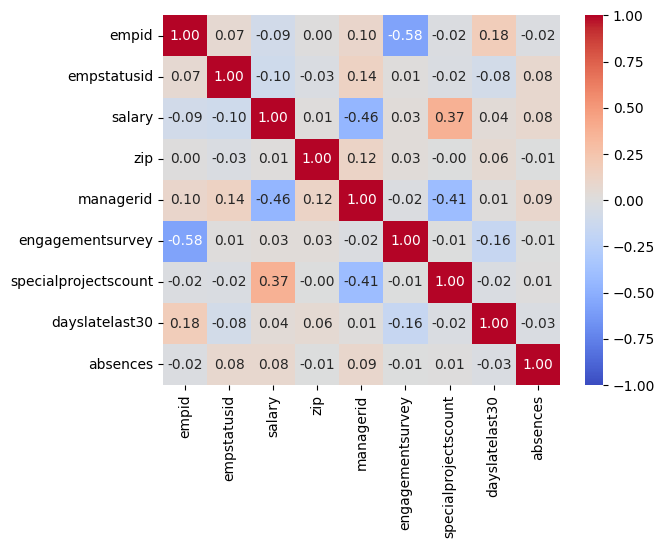

In [11]:
sns.heatmap(df_correlaciones, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "coolwarm", # para establecer el color de la gráfica
            vmax = 1, # para indicar cual es el valor máximo de nuestra escala de colores
            vmin = -1); # para identificar el valor mínimo de nuestra escala de colores

1. **Correlación Débil**:

   - El valor absoluto del coeficiente de correlación está cerca de 0.

   - Por lo general, se considera una correlación débil si el valor absoluto está por debajo de 0.3.

2. **Correlación Moderada**:

   - El valor absoluto del coeficiente de correlación está en el rango de 0.3 a 0.7.

   - Se considera una correlación moderada si el valor absoluto está en este rango.

3. **Correlación Fuerte**:

   - El valor absoluto del coeficiente de correlación es igual o superior a 0.7.

   - Se considera una correlación fuerte si el valor absoluto está en este rango.

## Correlaciones Moderadas: 
    
**NEGATIVAS:**
- engagementsurvey y empid --> Es el número de empleado, por lo que no nos interesa esta relación
- managerid y salary --> Es el número de manager por lo que no es numerica realmente
- managerid y specialprojectscount --> Es el número de manager por lo que no es numerica realmente
    
**POSITIVAS:**
- specialprojectscount y salary

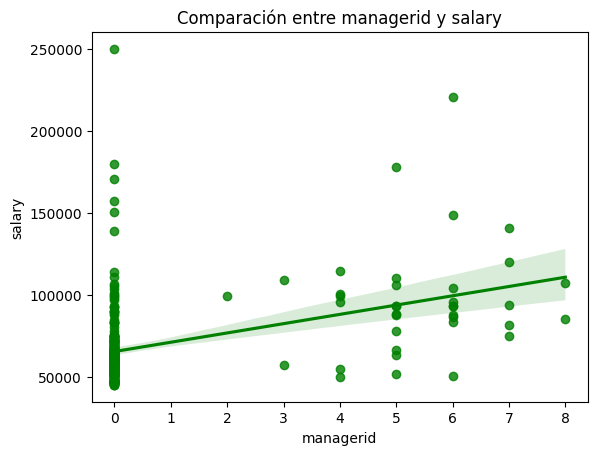

In [12]:
sns.regplot(x = "specialprojectscount", 
                y = "salary", 
                data = df, 
                color = "green")
plt.title('Comparación entre managerid y salary')
plt.xlabel('managerid')
plt.ylabel('salary')
plt.show()

In [13]:
# queremos analizar la distribución del deppartamento en nuestro conjunto de datos.
# calculamos la tabla de frecuencia absoluta
frecuencia_absoluta = df['department'].value_counts()

# calculamos la tabla de frecuencia relativa incluyendo el parámetro "normalize" para que nos lo convierta en tanto por 1. 
frecuencia_relativa = df['department'].value_counts(normalize=True) * 100

# creamos un DataFrame para mostrar ambas tablas
tabla_frecuencias = pd.DataFrame({
    'Departamentos': frecuencia_absoluta.index,
    'Frecuencia Absoluta': frecuencia_absoluta.values,
    'Frecuencia Relativa (%)': frecuencia_relativa.values
})
# vemos la tabla de frecuencias
tabla_frecuencias

,Departamentos,Frecuencia Absoluta,Frecuencia Relativa (%)
0,Production,208,66.881029
1,IT/IS,50,16.077170
2,Sales,32,10.289389
3,Software Engineering,10,3.215434
4,Admin Offices,10,3.215434
5,Executive Officer,1,0.321543


In [14]:
# queremos analizar la distribución del deppartamento en nuestro conjunto de datos.
# calculamos la tabla de frecuencia absoluta
frecuencia_absoluta = df['genderid'].value_counts()

# calculamos la tabla de frecuencia relativa incluyendo el parámetro "normalize" para que nos lo convierta en tanto por 1. 
frecuencia_relativa = df['genderid'].value_counts(normalize=True) * 100

# creamos un DataFrame para mostrar ambas tablas
tabla_frecuencias = pd.DataFrame({
    'Departamentos': frecuencia_absoluta.index,
    'Frecuencia Absoluta': frecuencia_absoluta.values,
    'Frecuencia Relativa (%)': frecuencia_relativa.values
})
# vemos la tabla de frecuencias
tabla_frecuencias

,Departamentos,Frecuencia Absoluta,Frecuencia Relativa (%)
0,Femenine,176,56.59164
1,Masculine,135,43.40836


In [15]:
# queremos analizar cómo se distribuye el departamento  en función del sexo.
# creamos  la tabla de contingencia usando el método crosstab de pandas
tabla_contingencia = pd.crosstab(df['genderid'], df['department'], normalize=True) * 100

# Interpretación: La tabla de contingencia muestra cuántos empleados pertenecen a cada combinación de ambas variables (nos muestra el %).
tabla_contingencia

department,Admin Offices,Executive Officer,IT/IS,Production,Sales,Software Engineering
genderid,,,,,,
Femenine,1.929260,0.321543,7.073955,40.514469,4.823151,1.929260
Masculine,1.286174,0.000000,9.003215,26.366559,5.466238,1.286174


In [16]:
# queremos analizar cómo se distribuye el departamento  en función del sexo.
# creamos  la tabla de contingencia usando el método crosstab de pandas
tabla_contingencia = pd.crosstab(df['termd'], df['department'], normalize=True) * 100

# Interpretación: La tabla de contingencia muestra cuántos empleados pertenecen a cada combinación de ambas variables (nos muestra el %).
tabla_contingencia

department,Admin Offices,Executive Officer,IT/IS,Production,Sales,Software Engineering
termd,,,,,,
No,2.250804,0.321543,12.861736,40.192926,8.681672,2.250804
Yes,0.964630,0.000000,3.215434,26.688103,1.607717,0.964630


In [91]:
# vamos a definir una función para poder hacer el t-test de Student

def prueba_hipotesis(*args):
    
    # lo primero que tenemos que hacer es mirar si las varianzas son iguales o no
    if len(args) == 2:
        p_valor_varianza = stats.levene(*args, center = "median")[1]
    else:
        p_valor_varianza = stats.bartlett(*args)[1]
    
    if p_valor_varianza > 0.05:
        # realizamos la prueba t de Student
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
    else:
        t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
        
    # Establecemos un nivel de significancia (alfa)
    alfa = 0.05

    # comparamos el p-valor con el nivel de significancia
    if p_valor < alfa:
        print(f"Con un p_valor de: {p_valor}")
        print("¡¡¡Rechazamos la hipótesis nula!!!")
        print("*** Hay una diferencia significativa entre los dos grupos. ***")
    else:
        print("No podemos rechazar la hipótesis nula.")
        print("No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.")

H0: No hay diferencia en el promedio de personas que dejan la empresa por salario

H1: Sí la hay

In [67]:
# filtramos los datos para obtener dos grupos: salida de la empresa y sigue en ella
empleado = df[df['termd'] == 'No']["salary"]
ex_empleado = df[df['termd'] == 'Yes']["salary"]

# llamamos a la función que hemos creado
prueba_hipotesis(empleado, ex_empleado)


No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.


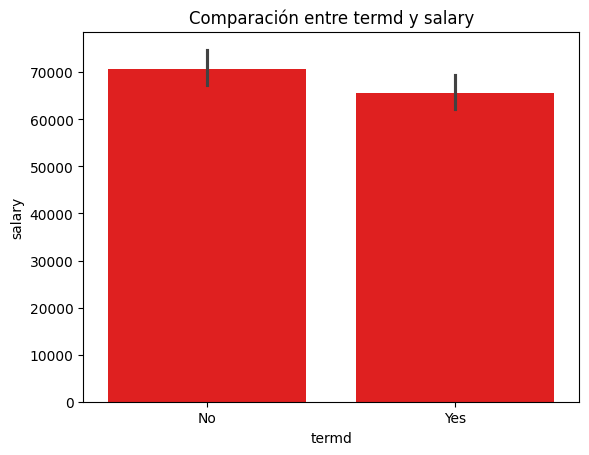

In [19]:
sns.barplot(x = "termd", 
                y = "salary", 
                data = df, 
                color = "red")
plt.title('Comparación entre termd y salary')
plt.xlabel('termd')
plt.ylabel('salary')
plt.show()

## No parece haber relación entre las personas que dejan o no la empresa y el salario

In [20]:
# Tabla de contingencia termd / department
pd.crosstab(index=df['termd'],
            columns=df['department'], margins=True)


department,Admin Offices,Executive Officer,IT/IS,Production,Sales,Software Engineering,All
termd,,,,,,,
No,7,1,40,125,27,7,207
Yes,3,0,10,83,5,3,104
All,10,1,50,208,32,10,311


In [21]:
# Tabla de contingencia % termd / department
pd.crosstab(index=df['termd'],
            columns=df['department'], margins=True).apply(lambda r: r/len(df) *100,
                                axis=1)

department,Admin Offices,Executive Officer,IT/IS,Production,Sales,Software Engineering,All
termd,,,,,,,
No,2.250804,0.321543,12.861736,40.192926,8.681672,2.250804,66.559486
Yes,0.964630,0.000000,3.215434,26.688103,1.607717,0.964630,33.440514
All,3.215434,0.321543,16.077170,66.881029,10.289389,3.215434,100.000000


In [23]:
#!pip install dython

In [27]:
import math
import numpy as np
from dython.nominal import associations, theils_u
import scipy.stats as ss
_REPLACE='replace'
_DEFAULT_REPLACE_VALUE = 0.0

H0: Indica que no hay asociación entre las variables categóricas (independencia).

H1: Indica una asociación perfecta y completa entre las variables categóricas.

Si Theil's U es bajo, significa que las categorías en 'termd' no proporcionan mucha información sobre las categorías en 'department' y viceversa.

In [28]:
theils_u(df['termd'], df['department'])

0.03620357814340961

La asociación entre las variables es baja y las variables parecen estar relativamente independientes.

In [29]:
theils_u(df['termd'], df['genderid'])

0.00019460815966479392

In [30]:
theils_u(df['termd'], df['salary'])

0.9930050896728547

Tasa de proporcion de gente que deja la empresa

In [69]:
# Calcular la proporción de personas que dejan la empresa ('termd' = 'Yes')
df['termd'].value_counts()['Yes'] / len(df['termd'])

0.33440514469453375

In [70]:
# Crear un DataFrame con la cantidad de personas que se van por 'department'
departure_by_department = df[df['termd'] == 'Yes'].groupby('department').size().reset_index(name='departure_count')

print(departure_by_department)

             department  departure_count
0         Admin Offices                3
1                 IT/IS               10
2            Production               83
3                 Sales                5
4  Software Engineering                3


In [71]:
staying_by_department = df[df['termd'] == 'No'].groupby('department').size().reset_index(name='staying_count')

print(staying_by_department)

             department  staying_count
0         Admin Offices              7
1     Executive Officer              1
2                 IT/IS             40
3            Production            125
4                 Sales             27
5  Software Engineering              7


(0.0, 125.0)

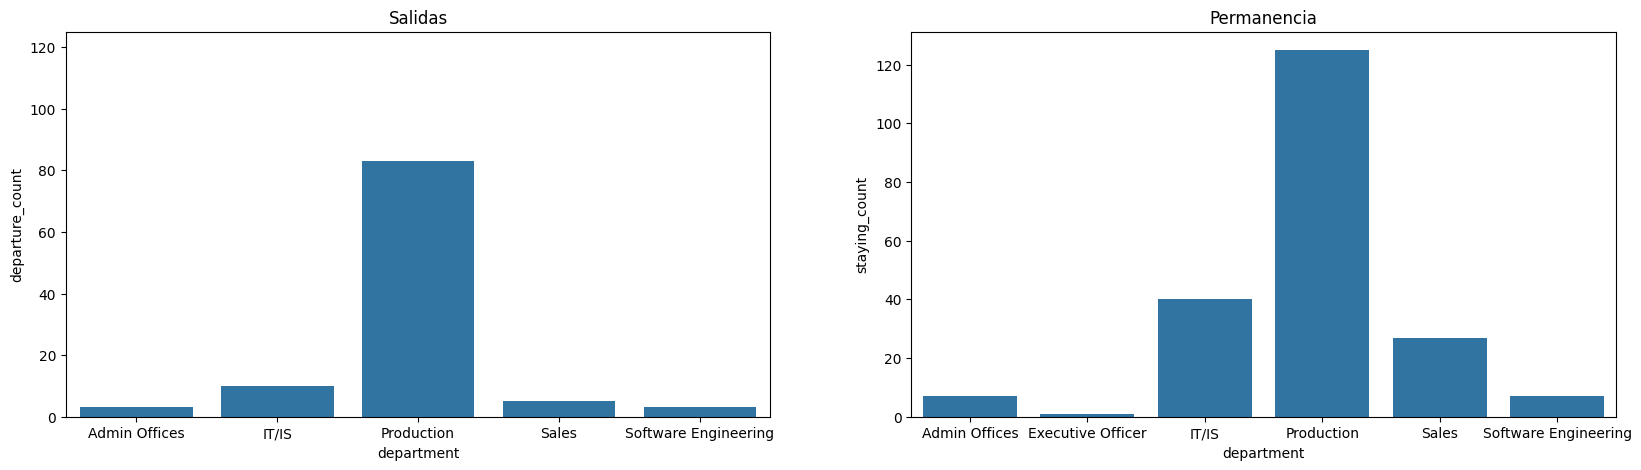

In [72]:
# Crear subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
# Gráfico 1: Salidas de la empresa
sns.barplot(x="department", y="departure_count", data=departure_by_department, ax=axes[0])
axes[0].set_title("Salidas")

# Gráfico 2: Permanencia
sns.barplot(x="department", y="staying_count", data=staying_by_department, ax=axes[1])
axes[1].set_title("Permanencia")
axes[0].set_ylim(0, max(staying_by_department['staying_count']))  # Establecer el rango del eje y

## Por departamentos (1 a 1) con salario

In [73]:
departamentos = df["department"].unique()

#Filtramos por departamentos, agrupamos en ex_empleado/empleado y comparamos con salario
for dep in departamentos:
    empleado = df[(df['termd'] == 'No') & (df['department'] == dep)]["salary"]
    ex_empleado = df[(df['termd'] == 'Yes') & (df['department'] == dep)]["salary"]

    # llamamos a la función que hemos creado
    print(f"Para el departamento {dep.upper()} vemos que:")
    prueba_hipotesis(empleado, ex_empleado)
    print("------------------------------------------------------")

Para el departamento PRODUCTION vemos que:
No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.
------------------------------------------------------
Para el departamento IT/IS vemos que:
No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.
------------------------------------------------------
Para el departamento SOFTWARE ENGINEERING vemos que:
No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.
------------------------------------------------------
Para el departamento ADMIN OFFICES vemos que:
No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.
------------------------------------------------------
Para el departamento SALES vemos que:
No podemos rechazar la hipótesis nula.

In [75]:
satisfaccion = df["empsatisfaction"].unique()

#Filtramos por satisfaccion, departamento de admin offices, agrupamos en ex_empleado/empleado y comparamos con la implicacion 
for sat in satisfaccion:
    empleado_adminoffices = df[(df['termd'] == 'No') & (df['department'] == 'Admin Offices') & (df['empsatisfaction'] == sat)]["engagementsurvey"]
    ex_empleado_adminoffices = df[(df['termd'] == 'Yes') & (df['department'] == 'Admin Offices') & (df['empsatisfaction'] == sat)]["engagementsurvey"]

    # llamamos a la función que hemos creado
    print(f"Para el departamento {sat.upper()} vemos que:")
    prueba_hipotesis(empleado_adminoffices, ex_empleado_adminoffices)
    print("------------------------------------------------------")

Para el departamento VERY SATISFIED vemos que:
No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.
------------------------------------------------------
Para el departamento NEUTRAL vemos que:
No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.
------------------------------------------------------
Para el departamento SATISFIED vemos que:
No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.
------------------------------------------------------
Para el departamento DISSATISFIED vemos que:
No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.
------------------------------------------------------
Para el departamento VERY DISSATISFIED vemos que:
No podemos rechazar la hipótesis

In [92]:
departamentos = df["department"].unique()

#Filtramos por departamentos, agrupamos en ex_empleado/empleado y comparamos con la implicacion
for dep in departamentos:
    empleado = df[(df['termd'] == 'No') & (df['department'] == dep)]["engagementsurvey"]
    ex_empleado = df[(df['termd'] == 'Yes') & (df['department'] == dep)]["engagementsurvey"]

    # llamamos a la función que hemos creado
    print(f"Para el departamento {dep.upper()} vemos que:")
    prueba_hipotesis(empleado, ex_empleado)
    print("------------------------------------------------------")

Para el departamento PRODUCTION vemos que:
No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.
------------------------------------------------------
Para el departamento IT/IS vemos que:
No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.
------------------------------------------------------
Para el departamento SOFTWARE ENGINEERING vemos que:
No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.
------------------------------------------------------
Para el departamento ADMIN OFFICES vemos que:
Con un p_valor de: 0.023559977703211422
¡¡¡Rechazamos la hipótesis nula!!!
*** Hay una diferencia significativa entre los dos grupos. ***
------------------------------------------------------
Para el departamento SALES vemos que:
No podemos rechazar la hipótesi

## En ADMIN OFFICES encontramos una diferencia significativa entre los que se van y los que se quedan y su implicación

In [103]:
sexo = df["genderid"].unique()

#Filtramos por departamentos, agrupamos en ex_empleado/empleado y comparamos con la implicacion
for sex in sexo:
    for dep in departamentos:
        empleado = df[(df['termd'] == 'No') & (df['department'] == dep) & (df['genderid'] == sex)]["engagementsurvey"]
        ex_empleado = df[(df['termd'] == 'Yes') & (df['department'] == dep)]["engagementsurvey"]

        # llamamos a la función que hemos creado
        print(f"Para el departamento {dep.upper()} siendo {sex} vemos que:")
        prueba_hipotesis(empleado, ex_empleado)
        print("------------------------------------------------------")

Para el departamento PRODUCTION siendo Masculine vemos que:
No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.
------------------------------------------------------
Para el departamento IT/IS siendo Masculine vemos que:
No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.
------------------------------------------------------
Para el departamento SOFTWARE ENGINEERING siendo Masculine vemos que:
No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.
------------------------------------------------------
Para el departamento ADMIN OFFICES siendo Masculine vemos que:
No podemos rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia significativa entre los dos grupos.
------------------------------------------------------
Para el 

## En ADMIN OFFICES encontramos una diferencia significativa entre los que se van y los que se quedan y su implicación y su GÉNERO

In [79]:
# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

    

In [80]:
normalidad(df,'engagementsurvey')

Para la columna engagementsurvey los datos no siguen una distribución normal.


In [93]:
def prueba_mann_whitney(emp_no, emp_yes):
    if len(emp_no) == 0 or len(emp_yes) == 0:
        print("No hay datos suficientes para realizar la prueba de Mann-Whitney U.")
        return

    # Aplicar la prueba de Mann-Whitney U
    _, p_value = stats.mannwhitneyu(emp_no, emp_yes)

    # Imprimir los resultados
    if p_value < 0.05:
        print(p_value)
        print("Hay una diferencia significativa en las medianas.")
    else:
        print(p_value)
        print("No hay una diferencia significativa en las medianas.")

In [94]:
departamentos = df["department"].unique()

for dep in departamentos:
    empleado_no = df[(df['termd'] == 'No') & (df['department'] == dep)]["engagementsurvey"]
    empleado_yes = df[(df['termd'] == 'Yes') & (df['department'] == dep)]["engagementsurvey"]

    print(f"Para el departamento {dep.upper()}:")
    prueba_mann_whitney(empleado_no, empleado_yes)
    print("------------------------------------------------------")


Para el departamento PRODUCTION:
0.8705538903416186
No hay una diferencia significativa en las medianas.
------------------------------------------------------
Para el departamento IT/IS:
0.3813671664601166
No hay una diferencia significativa en las medianas.
------------------------------------------------------
Para el departamento SOFTWARE ENGINEERING:
0.6475057684266377
No hay una diferencia significativa en las medianas.
------------------------------------------------------
Para el departamento ADMIN OFFICES:
0.05993542764678846
No hay una diferencia significativa en las medianas.
------------------------------------------------------
Para el departamento SALES:
0.6027958728797822
No hay una diferencia significativa en las medianas.
------------------------------------------------------
Para el departamento EXECUTIVE OFFICER:
No hay datos suficientes para realizar la prueba de Mann-Whitney U.
------------------------------------------------------


In [104]:
sexo = df["genderid"].unique()

#Filtramos por departamentos, agrupamos en ex_empleado/empleado y comparamos con la implicacion
for sex in sexo:
    for dep in departamentos:
        empleado = df[(df['termd'] == 'No') & (df['department'] == dep) & (df['genderid'] == sex)]["engagementsurvey"]
        ex_empleado = df[(df['termd'] == 'Yes') & (df['department'] == dep)]["engagementsurvey"]

        # llamamos a la función que hemos creado
        print(f"Para el departamento {dep.upper()} siendo {sex} vemos que:")
        prueba_mann_whitney(empleado, ex_empleado)
        print("------------------------------------------------------")

Para el departamento PRODUCTION siendo Masculine vemos que:
0.8776719505688036
No hay una diferencia significativa en las medianas.
------------------------------------------------------
Para el departamento IT/IS siendo Masculine vemos que:
0.2791800374254878
No hay una diferencia significativa en las medianas.
------------------------------------------------------
Para el departamento SOFTWARE ENGINEERING siendo Masculine vemos que:
0.8
No hay una diferencia significativa en las medianas.
------------------------------------------------------
Para el departamento ADMIN OFFICES siendo Masculine vemos que:
0.4
No hay una diferencia significativa en las medianas.
------------------------------------------------------
Para el departamento SALES siendo Masculine vemos que:
1.0
No hay una diferencia significativa en las medianas.
------------------------------------------------------
Para el departamento EXECUTIVE OFFICER siendo Masculine vemos que:
No hay datos suficientes para realizar l

## Siendo mujer hay una diferencia significativa en ADMIN OFFICES